<a href="https://colab.research.google.com/github/apooravm/pyTorch-nbs/blob/main/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn # nn contains basic building block for graphs (nn graphs)
import matplotlib.pyplot as plt

torch.__version__

'1.13.1+cu116'

# NN Graph
<img src="https://1.cms.s81c.com/sites/default/files/2021-04-15/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png" width="400px">y

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3
# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
from IPython.lib.display import YouTubeVideo
# Train/Test Split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_test), len(y_test), len(X_train), len(y_train)

(10, 10, 40, 40)

# YT

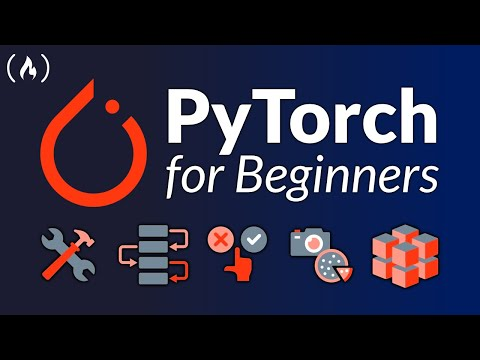

In [4]:
vid = YouTubeVideo("V_xro1bcAuA", start=17943)
# vid = YouTubeVideo("V_xro1bcAuA", start=17943, width=800, height=450)
display(vid)

# Splitting the data into training and test sets

In [5]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10, 7))

  # Training data
  plt.scatter(train_data, train_labels, c="red", s=4, label="Training Data")
  # Test Data
  plt.scatter(test_data, test_labels, c="green", s=4, label="Predictions")
  # Predicted Data
  try:
    plt.scatter(test_data, predictions)
  except:
    pass

  plt.legend(prop={"size": 14})

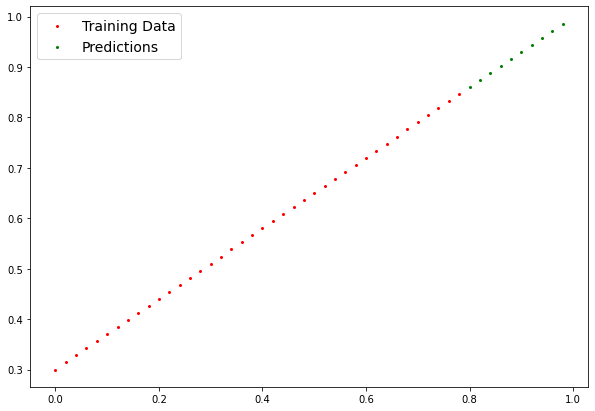

In [6]:
plot_predictions()

# Building the PyTorch Model

In [7]:
from torch import nn

# Creating the linear Regression model class 
# Everything in PyTorch is inherited from nn.module

# Start with random numbers(params) and look at the train_dataset
# update the random numbers to reach the pattern

# Start with random values
# Look at training data
# Adjust the starting values to better represent (get closer to) the 
# ideal values (weight bias vals used to create the actual data)

# Using 
# Gradient Descent
# Backpropagation
class LinearRegressionModel(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True, # requires gradient: ??
                                            dtype=torch.float)) 
    
    self.bias = nn.Parameter(torch.randn(1, 
                                         requires_grad=True,
                                         dtype=torch.float))
    
    # Forward method to define the computation in the model
    # Take the weights and bias and try to represent them as params?

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.weights * x + self.bias # Linear regression formula



In [25]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [27]:
# Making predictions using torch.inference_mode()
# Precting y_test based on x_test

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds.squeeze(dim=0)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

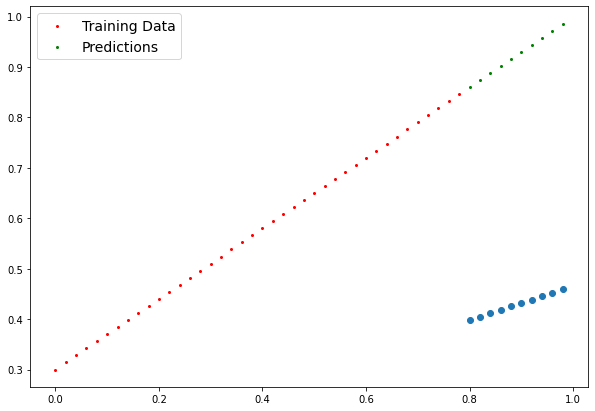

In [28]:
plot_predictions(predictions=y_preds)

## Train Data

Measure how well/poor the models predictions are as compared to the actual data
Loss Function = Cost Function = Criterion Function

- Loss func: measures the accuracy
- Optimizer(optim): Takes into account the loss of a model and adjusts the models parameters (eg weights, biases)

For PyTorch we need
- A training loop
- A testing loop

In [32]:
# Setup the loss func
loss_fn = nn.L1Loss()

# Setup optimizer (Stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            # lr = Learning Rate
                            lr=0.01)

## Training Loop
Building a training (and testing) loop in pytorch

- loop through data
- forward pass/forward propagation: data moving through the models forward func (input to output layer)
- Calculate the loss: compare forward pass predictions to ground truth labels
- Optimize zero grad
- Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss 
- Optimizer Step

In [ ]:
# epoch is one loop through the data
epochs = 1

# 0: Loop through the data
for epoch in epochs:
  # Set the model to training mode
  model_0.train() # train mode in pytorch 

  # 1: Forward Pass
  y_pred = model_0(X_train)

  # 2: Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3: Optimizer zero grad
  optimizer.zero_grad()

  # 4: Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5: Step the optimizer (perform gradient descent)
  optimizer.step()

  model_0.eval()